# Time Series Analysis

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import os
import statsmodels.api as sm
from datetime import datetime, timedelta
from scipy import stats

In [3]:
cwd = os.getcwd()
date_format = "%Y-%m-%d"
TORNADO_PATH = os.path.join(cwd, "..", "data/tornadoes/US_tornadoes_2000_2022.csv")
TORNADO_SHAPEFILE = os.path.join(cwd, "..", "data/geographic/US_tornadoes_1950_2022/US_tornadoes_1950_2022.shp")
COUNTIES_PATH = os.path.join(cwd, "..", "data/counties/2018_counties.csv")
COUNTIES_SHAPEFILE = os.path.join(cwd, "..", "data/geographic/cb_2018_us_county_5m/cb_2018_us_county_5m.shp")
INTERSECTION_PATH = os.path.join(cwd, "..", "data/tornado_county_intersections.csv")
PERCENT_PATH = os.path.join(cwd, "..", "data/tornadoes_and_counties_new.csv")
RESULTS_PATH = os.path.join(cwd, "..", "data/results_2000s.csv")

In [85]:
def extractVotes(data_vote, county_set):
    output = []
    for county_id in county_set:
        
        row = data_vote[data_vote["fips"]==county_id]
        # print(data_county)
        votes = row[["2004","2008","2012","2016","2020"]].values.flatten()
        mean = np.mean(votes)
        std_dev = np.std(votes)
        votes = np.append(votes,mean)
        votes = np.append(votes,std_dev)
        output.append(votes)
        
    return np.array(output)

def extractMonths(data_tornado, id_set, startDate, endDate, duration):
    output = []
    currentDate = startDate
    
    
    
    
    while currentDate < endDate:
        
        def inBetween(date_str):
            # print(date_str)
            date = datetime.strptime(date_str,date_format)
            return date >= currentDate and date < (currentDate+duration)
        condition_vector = np.vectorize(inBetween)
        condition_mask = condition_vector(data_tornado["date"])
        data_date = data_tornado[condition_mask]
        
        # data_filtered = data_filtered[datetime.strftime(data_filtered["date"],date_format) < startDate+ duration]
        nextRow = []
        for id in id_set:
            data_filtered = data_date[data_date["GEOID"]==id]
            tornadoCount_nonzero = len(data_filtered)
            costAgg = sum(data_filtered["loss"])
            casualties = sum(data_filtered["fat"])+sum(data_filtered["inj"])
            nextRow.append([currentDate, tornadoCount_nonzero,costAgg,casualties])
            
        currentDate = currentDate+duration
        output.append(nextRow)
        print(currentDate)
    
    return np.array(output)


        
        
    
    

In [98]:
def runTimeSeries():
    data_tornado = pd.read_csv(PERCENT_PATH)
    data_vote = pd.read_csv(RESULTS_PATH)
    data_tornado = data_tornado[data_tornado["loss"]>0]
    
    counties = set(data_tornado[data_tornado["yr"]>1995]["GEOID"]).intersection(set(data_vote["fips"]))
    print(counties)
    duration = timedelta(days = 182.625)
    startTime = datetime.strptime("2000-01-01",date_format)
    endTime = datetime.strptime("2020-12-30",date_format)
    # for county_id in counties:
    countyData = extractMonths(data_tornado,counties, startTime,endTime,duration)
    countyVotes = extractVotes(data_vote,counties)
    
    # print(countyVotes)
    # print(countyVotes.shape)
    return countyData, countyVotes
    
countyData, countyVotes = runTimeSeries()

{41005, 41007, 41009, 41015, 41019, 41025, 41031, 41039, 41041, 41043, 41045, 41047, 41049, 41051, 41053, 41057, 41059, 41063, 41067, 33001, 33003, 33005, 33007, 33009, 33011, 33013, 33015, 33017, 33019, 25001, 25003, 25005, 25011, 25013, 25015, 25017, 25021, 25023, 25025, 25027, 17001, 17003, 17005, 17007, 17009, 17011, 17013, 17015, 17017, 17019, 17021, 17023, 17025, 17027, 17029, 17031, 17033, 17037, 17039, 17041, 17043, 17045, 17047, 17049, 17051, 17053, 17055, 17057, 17059, 17061, 17063, 17065, 17067, 17071, 17073, 17075, 17077, 17079, 17081, 17087, 17089, 17091, 17093, 17095, 17097, 17099, 17101, 17103, 17105, 17107, 17109, 17111, 17113, 17115, 17117, 17119, 17121, 17123, 17125, 17127, 17129, 17131, 17133, 17135, 17137, 17139, 17141, 17143, 17145, 17147, 17149, 17151, 17153, 17155, 17157, 17159, 17161, 17163, 17165, 17167, 17169, 17171, 17173, 17175, 17177, 17179, 17181, 17183, 17185, 17187, 17189, 17191, 17193, 9001, 17195, 9003, 9005, 17197, 17199, 9009, 17201, 17203, 9011, 901

(2666, 7)
(42, 2666, 4)
895
[datetime.datetime(2000, 1, 1, 0, 0) datetime.datetime(2000, 7, 1, 15, 0)
 datetime.datetime(2000, 12, 31, 6, 0)
 datetime.datetime(2001, 7, 1, 21, 0)
 datetime.datetime(2001, 12, 31, 12, 0)
 datetime.datetime(2002, 7, 2, 3, 0)
 datetime.datetime(2002, 12, 31, 18, 0)
 datetime.datetime(2003, 7, 2, 9, 0) datetime.datetime(2004, 1, 1, 0, 0)
 datetime.datetime(2004, 7, 1, 15, 0)
 datetime.datetime(2004, 12, 31, 6, 0)
 datetime.datetime(2005, 7, 1, 21, 0)
 datetime.datetime(2005, 12, 31, 12, 0)
 datetime.datetime(2006, 7, 2, 3, 0)
 datetime.datetime(2006, 12, 31, 18, 0)
 datetime.datetime(2007, 7, 2, 9, 0) datetime.datetime(2008, 1, 1, 0, 0)
 datetime.datetime(2008, 7, 1, 15, 0)
 datetime.datetime(2008, 12, 31, 6, 0)
 datetime.datetime(2009, 7, 1, 21, 0)
 datetime.datetime(2009, 12, 31, 12, 0)
 datetime.datetime(2010, 7, 2, 3, 0)
 datetime.datetime(2010, 12, 31, 18, 0)
 datetime.datetime(2011, 7, 2, 9, 0) datetime.datetime(2012, 1, 1, 0, 0)
 datetime.datetime(20

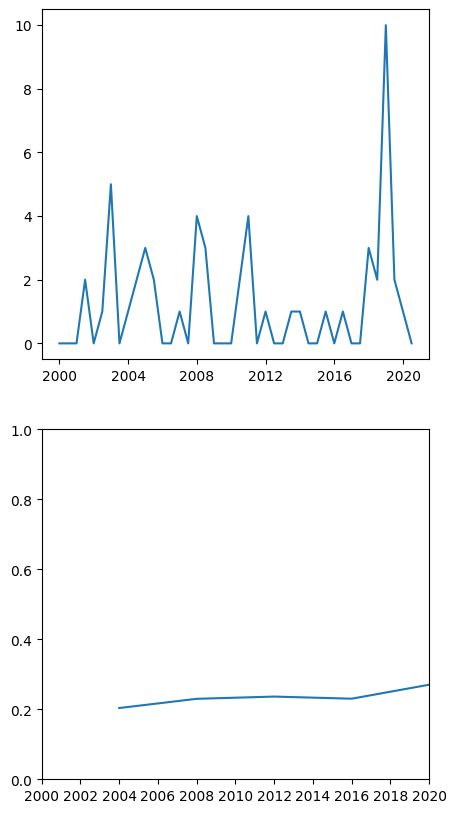

In [107]:
print(countyVotes.shape)
print(countyData.shape)

def regress_tornadoes(countyIndex, countyVotes, countyTorns):
    startDate = datetime.strptime("2000-01-01",date_format)
    elections = []
    for year in range(2004,2021, 4):
        elections.append(datetime(year=year,day=1,month=1))
    
    
    tornadoMetrics = countyTorns[:,countyIndex,:]
    voteMetrics = countyVotes[countyIndex,:5]
    
    
    # plt.scatter(elections,voteMetrics)
    print(tornadoMetrics[:,0])
    print(tornadoMetrics[:,1])
    fig, axs = plt.subplots(2, figsize=(5,10))
    axs[0].plot(tornadoMetrics[:,0], tornadoMetrics[:,1])
    axs[1].plot(elections,voteMetrics)
    axs[1].set_ylim([0,1.0])
    axs[1].set_xlim([startDate,elections[-1]])
    
    plt.show()


print(np.argmax(np.mean(countyData[:,:,1],axis= 0)))
regress_tornadoes(895,countyVotes,countyData)